## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.01),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 2.72308 | train_mse: 1.77461 | train_mae: 1.00935 |  0:00:00s


epoch 1  | loss: 1.25433 | train_mse: 0.96838 | train_mae: 0.71167 |  0:00:01s


epoch 2  | loss: 0.78594 | train_mse: 0.79334 | train_mae: 0.63641 |  0:00:01s


epoch 3  | loss: 0.62565 | train_mse: 0.77913 | train_mae: 0.58089 |  0:00:02s


epoch 4  | loss: 0.50626 | train_mse: 0.57725 | train_mae: 0.51404 |  0:00:02s


epoch 5  | loss: 0.45936 | train_mse: 0.6458  | train_mae: 0.51312 |  0:00:03s


epoch 6  | loss: 0.43778 | train_mse: 0.66517 | train_mae: 0.49669 |  0:00:03s


epoch 7  | loss: 0.30927 | train_mse: 0.52247 | train_mae: 0.48749 |  0:00:03s


epoch 8  | loss: 0.35196 | train_mse: 0.30385 | train_mae: 0.39507 |  0:00:04s


epoch 9  | loss: 0.33622 | train_mse: 0.36201 | train_mae: 0.43315 |  0:00:04s


epoch 10 | loss: 0.31918 | train_mse: 0.2915  | train_mae: 0.39391 |  0:00:05s


epoch 11 | loss: 0.33926 | train_mse: 0.2921  | train_mae: 0.3912  |  0:00:05s


epoch 12 | loss: 0.34985 | train_mse: 0.28995 | train_mae: 0.38232 |  0:00:05s


epoch 13 | loss: 0.32135 | train_mse: 0.23033 | train_mae: 0.35452 |  0:00:06s


epoch 14 | loss: 0.25658 | train_mse: 0.20081 | train_mae: 0.31606 |  0:00:06s


epoch 15 | loss: 0.20494 | train_mse: 0.21655 | train_mae: 0.33356 |  0:00:07s


epoch 16 | loss: 0.35746 | train_mse: 0.22036 | train_mae: 0.33161 |  0:00:07s


epoch 17 | loss: 0.255   | train_mse: 0.16748 | train_mae: 0.29901 |  0:00:07s


epoch 18 | loss: 0.2776  | train_mse: 0.20934 | train_mae: 0.31834 |  0:00:08s


epoch 19 | loss: 0.25351 | train_mse: 0.17707 | train_mae: 0.30635 |  0:00:08s


epoch 20 | loss: 0.32014 | train_mse: 0.19362 | train_mae: 0.30807 |  0:00:08s


epoch 21 | loss: 0.25411 | train_mse: 0.24869 | train_mae: 0.33502 |  0:00:09s


epoch 22 | loss: 0.25772 | train_mse: 0.21737 | train_mae: 0.3313  |  0:00:09s


epoch 23 | loss: 0.23375 | train_mse: 0.16804 | train_mae: 0.30051 |  0:00:09s


epoch 24 | loss: 0.23095 | train_mse: 0.28803 | train_mae: 0.3619  |  0:00:10s


epoch 25 | loss: 0.27013 | train_mse: 0.19513 | train_mae: 0.3132  |  0:00:10s


epoch 26 | loss: 0.23132 | train_mse: 0.19009 | train_mae: 0.30535 |  0:00:11s


epoch 27 | loss: 0.21394 | train_mse: 0.17203 | train_mae: 0.30091 |  0:00:11s


epoch 28 | loss: 0.23393 | train_mse: 0.19439 | train_mae: 0.31481 |  0:00:11s


epoch 29 | loss: 0.23581 | train_mse: 0.24501 | train_mae: 0.31742 |  0:00:12s


epoch 30 | loss: 0.23222 | train_mse: 0.16738 | train_mae: 0.29791 |  0:00:12s


epoch 31 | loss: 0.21655 | train_mse: 0.17388 | train_mae: 0.29411 |  0:00:12s


epoch 32 | loss: 0.21773 | train_mse: 0.17718 | train_mae: 0.29627 |  0:00:13s


epoch 33 | loss: 0.23013 | train_mse: 0.18131 | train_mae: 0.30132 |  0:00:13s


epoch 34 | loss: 0.26527 | train_mse: 0.17639 | train_mae: 0.29182 |  0:00:14s


epoch 35 | loss: 0.23209 | train_mse: 0.19038 | train_mae: 0.29946 |  0:00:14s


epoch 36 | loss: 0.22072 | train_mse: 0.19571 | train_mae: 0.30627 |  0:00:14s


epoch 37 | loss: 0.19865 | train_mse: 0.16339 | train_mae: 0.29119 |  0:00:15s


epoch 38 | loss: 0.20487 | train_mse: 0.17701 | train_mae: 0.30729 |  0:00:15s


epoch 39 | loss: 0.21308 | train_mse: 0.2263  | train_mae: 0.33642 |  0:00:16s


epoch 40 | loss: 0.21175 | train_mse: 0.19329 | train_mae: 0.29246 |  0:00:16s


epoch 41 | loss: 0.24499 | train_mse: 0.18669 | train_mae: 0.29523 |  0:00:17s


epoch 42 | loss: 0.1877  | train_mse: 0.15033 | train_mae: 0.26929 |  0:00:17s


epoch 43 | loss: 0.20618 | train_mse: 0.19428 | train_mae: 0.29123 |  0:00:18s


epoch 44 | loss: 0.25636 | train_mse: 0.19648 | train_mae: 0.29606 |  0:00:18s


epoch 45 | loss: 0.21392 | train_mse: 0.2598  | train_mae: 0.31626 |  0:00:19s


epoch 46 | loss: 0.19984 | train_mse: 0.39611 | train_mae: 0.30707 |  0:00:19s


epoch 47 | loss: 0.2033  | train_mse: 0.17819 | train_mae: 0.28626 |  0:00:19s


epoch 48 | loss: 0.18828 | train_mse: 0.17857 | train_mae: 0.29295 |  0:00:20s


epoch 49 | loss: 0.18776 | train_mse: 0.22883 | train_mae: 0.2935  |  0:00:20s


epoch 50 | loss: 0.21197 | train_mse: 0.21297 | train_mae: 0.29654 |  0:00:21s


epoch 51 | loss: 0.1795  | train_mse: 0.19029 | train_mae: 0.27912 |  0:00:21s


epoch 52 | loss: 0.20089 | train_mse: 0.18233 | train_mae: 0.27575 |  0:00:21s


epoch 53 | loss: 0.1929  | train_mse: 0.15219 | train_mae: 0.27205 |  0:00:22s


epoch 54 | loss: 0.17752 | train_mse: 0.15003 | train_mae: 0.27157 |  0:00:22s


epoch 55 | loss: 0.18591 | train_mse: 0.13698 | train_mae: 0.26173 |  0:00:22s


epoch 56 | loss: 0.18322 | train_mse: 0.13626 | train_mae: 0.27145 |  0:00:23s


epoch 57 | loss: 0.1865  | train_mse: 0.14036 | train_mae: 0.26764 |  0:00:23s


epoch 58 | loss: 0.15708 | train_mse: 0.18337 | train_mae: 0.28002 |  0:00:23s


epoch 59 | loss: 0.18982 | train_mse: 0.15386 | train_mae: 0.28228 |  0:00:24s


epoch 60 | loss: 0.19079 | train_mse: 0.16512 | train_mae: 0.29377 |  0:00:24s


epoch 61 | loss: 0.18304 | train_mse: 0.15886 | train_mae: 0.26918 |  0:00:25s


epoch 62 | loss: 0.18347 | train_mse: 0.14823 | train_mae: 0.2678  |  0:00:25s


epoch 63 | loss: 0.16059 | train_mse: 0.13957 | train_mae: 0.25636 |  0:00:25s


epoch 64 | loss: 0.18355 | train_mse: 0.1376  | train_mae: 0.25725 |  0:00:26s


epoch 65 | loss: 0.14789 | train_mse: 0.11275 | train_mae: 0.24415 |  0:00:26s


epoch 66 | loss: 0.1702  | train_mse: 0.12795 | train_mae: 0.2607  |  0:00:26s


epoch 67 | loss: 0.18017 | train_mse: 0.13233 | train_mae: 0.26129 |  0:00:27s


epoch 68 | loss: 0.19815 | train_mse: 0.13999 | train_mae: 0.26862 |  0:00:27s


epoch 69 | loss: 0.17044 | train_mse: 0.13797 | train_mae: 0.26865 |  0:00:27s


epoch 70 | loss: 0.19416 | train_mse: 0.15765 | train_mae: 0.28408 |  0:00:28s


epoch 71 | loss: 0.16041 | train_mse: 0.13128 | train_mae: 0.2616  |  0:00:28s


epoch 72 | loss: 0.22187 | train_mse: 0.13462 | train_mae: 0.27377 |  0:00:29s


epoch 73 | loss: 0.20891 | train_mse: 0.13328 | train_mae: 0.26794 |  0:00:29s


epoch 74 | loss: 0.1674  | train_mse: 0.13048 | train_mae: 0.26313 |  0:00:29s


epoch 75 | loss: 0.1665  | train_mse: 0.13008 | train_mae: 0.27226 |  0:00:30s


epoch 76 | loss: 0.17174 | train_mse: 0.11418 | train_mae: 0.2465  |  0:00:30s


epoch 77 | loss: 0.1813  | train_mse: 0.11695 | train_mae: 0.24449 |  0:00:31s


epoch 78 | loss: 0.14856 | train_mse: 0.11646 | train_mae: 0.25168 |  0:00:31s


epoch 79 | loss: 0.15098 | train_mse: 0.11818 | train_mae: 0.25689 |  0:00:31s


epoch 80 | loss: 0.14562 | train_mse: 0.12704 | train_mae: 0.24575 |  0:00:32s


epoch 81 | loss: 0.18138 | train_mse: 0.12585 | train_mae: 0.25651 |  0:00:32s


epoch 82 | loss: 0.18368 | train_mse: 0.12365 | train_mae: 0.26286 |  0:00:32s


epoch 83 | loss: 0.12994 | train_mse: 0.12776 | train_mae: 0.24151 |  0:00:33s


epoch 84 | loss: 0.15733 | train_mse: 0.13296 | train_mae: 0.2555  |  0:00:33s


epoch 85 | loss: 0.16821 | train_mse: 0.17916 | train_mae: 0.26559 |  0:00:34s


epoch 86 | loss: 0.1574  | train_mse: 0.20072 | train_mae: 0.27215 |  0:00:34s


epoch 87 | loss: 0.14726 | train_mse: 0.15168 | train_mae: 0.26879 |  0:00:34s


epoch 88 | loss: 0.17676 | train_mse: 0.17147 | train_mae: 0.27863 |  0:00:35s


epoch 89 | loss: 0.1866  | train_mse: 0.16775 | train_mae: 0.26771 |  0:00:35s


epoch 90 | loss: 0.15314 | train_mse: 0.13519 | train_mae: 0.24722 |  0:00:35s


epoch 91 | loss: 0.16508 | train_mse: 0.2189  | train_mae: 0.29852 |  0:00:36s


epoch 92 | loss: 0.15146 | train_mse: 0.11794 | train_mae: 0.24935 |  0:00:36s


epoch 93 | loss: 0.12982 | train_mse: 0.11408 | train_mae: 0.24346 |  0:00:37s


epoch 94 | loss: 0.15866 | train_mse: 0.13119 | train_mae: 0.25245 |  0:00:37s


epoch 95 | loss: 0.17048 | train_mse: 0.12122 | train_mae: 0.24907 |  0:00:37s


epoch 96 | loss: 0.13522 | train_mse: 0.09379 | train_mae: 0.22127 |  0:00:38s


epoch 97 | loss: 0.14168 | train_mse: 0.129   | train_mae: 0.23372 |  0:00:38s


epoch 98 | loss: 0.17792 | train_mse: 0.1234  | train_mae: 0.25213 |  0:00:38s


epoch 99 | loss: 0.16172 | train_mse: 0.09151 | train_mae: 0.22097 |  0:00:39s


epoch 100| loss: 0.13826 | train_mse: 0.10594 | train_mae: 0.22742 |  0:00:39s


epoch 101| loss: 0.15236 | train_mse: 0.1279  | train_mae: 0.25433 |  0:00:39s


epoch 102| loss: 0.13375 | train_mse: 0.09432 | train_mae: 0.22827 |  0:00:40s


epoch 103| loss: 0.14194 | train_mse: 0.09763 | train_mae: 0.23116 |  0:00:40s


epoch 104| loss: 0.17328 | train_mse: 0.09442 | train_mae: 0.22614 |  0:00:41s


epoch 105| loss: 0.20422 | train_mse: 0.11577 | train_mae: 0.24419 |  0:00:41s


epoch 106| loss: 0.1113  | train_mse: 0.11086 | train_mae: 0.24247 |  0:00:41s


epoch 107| loss: 0.14642 | train_mse: 0.09918 | train_mae: 0.237   |  0:00:42s


epoch 108| loss: 0.16839 | train_mse: 0.11373 | train_mae: 0.23689 |  0:00:42s


epoch 109| loss: 0.18725 | train_mse: 0.11842 | train_mae: 0.23808 |  0:00:42s


epoch 110| loss: 0.1427  | train_mse: 0.09878 | train_mae: 0.22263 |  0:00:43s


epoch 111| loss: 0.14627 | train_mse: 0.1055  | train_mae: 0.23026 |  0:00:43s


epoch 112| loss: 0.13531 | train_mse: 0.10931 | train_mae: 0.23013 |  0:00:43s


epoch 113| loss: 0.15972 | train_mse: 0.11167 | train_mae: 0.24343 |  0:00:44s


epoch 114| loss: 0.1539  | train_mse: 0.08792 | train_mae: 0.21553 |  0:00:44s


epoch 115| loss: 0.1459  | train_mse: 0.11177 | train_mae: 0.24218 |  0:00:45s


epoch 116| loss: 0.13533 | train_mse: 0.09044 | train_mae: 0.21036 |  0:00:45s


epoch 117| loss: 0.12202 | train_mse: 0.07925 | train_mae: 0.20871 |  0:00:45s


epoch 118| loss: 0.15064 | train_mse: 0.10501 | train_mae: 0.23429 |  0:00:46s


epoch 119| loss: 0.11701 | train_mse: 0.09616 | train_mae: 0.22441 |  0:00:46s


epoch 120| loss: 0.10923 | train_mse: 0.08713 | train_mae: 0.21996 |  0:00:46s


epoch 121| loss: 0.12017 | train_mse: 0.07771 | train_mae: 0.20492 |  0:00:47s


epoch 122| loss: 0.1409  | train_mse: 0.09998 | train_mae: 0.23429 |  0:00:47s


epoch 123| loss: 0.14385 | train_mse: 0.07993 | train_mae: 0.20417 |  0:00:47s


epoch 124| loss: 0.1218  | train_mse: 0.11913 | train_mae: 0.25097 |  0:00:48s


epoch 125| loss: 0.14094 | train_mse: 0.10564 | train_mae: 0.22455 |  0:00:48s


epoch 126| loss: 0.16108 | train_mse: 0.11714 | train_mae: 0.23872 |  0:00:49s


epoch 127| loss: 0.1451  | train_mse: 0.089   | train_mae: 0.21307 |  0:00:49s


epoch 128| loss: 0.13307 | train_mse: 0.09709 | train_mae: 0.22046 |  0:00:50s


epoch 129| loss: 0.12762 | train_mse: 0.09346 | train_mae: 0.21817 |  0:00:50s


epoch 130| loss: 0.11111 | train_mse: 0.08365 | train_mae: 0.19967 |  0:00:50s


epoch 131| loss: 0.11005 | train_mse: 0.09012 | train_mae: 0.21311 |  0:00:51s


epoch 132| loss: 0.13778 | train_mse: 0.09841 | train_mae: 0.2133  |  0:00:51s


epoch 133| loss: 0.13147 | train_mse: 0.11245 | train_mae: 0.21839 |  0:00:51s


epoch 134| loss: 0.13677 | train_mse: 0.10533 | train_mae: 0.23535 |  0:00:52s


epoch 135| loss: 0.13419 | train_mse: 0.09146 | train_mae: 0.21842 |  0:00:52s


epoch 136| loss: 0.12931 | train_mse: 0.08755 | train_mae: 0.21025 |  0:00:52s


epoch 137| loss: 0.11963 | train_mse: 0.10847 | train_mae: 0.23458 |  0:00:53s


epoch 138| loss: 0.14748 | train_mse: 0.10186 | train_mae: 0.23387 |  0:00:53s


epoch 139| loss: 0.12879 | train_mse: 0.08603 | train_mae: 0.21149 |  0:00:54s


epoch 140| loss: 0.16938 | train_mse: 0.11327 | train_mae: 0.23481 |  0:00:54s


epoch 141| loss: 0.15328 | train_mse: 0.1084  | train_mae: 0.23426 |  0:00:54s


epoch 142| loss: 0.12673 | train_mse: 0.09139 | train_mae: 0.21241 |  0:00:55s


epoch 143| loss: 0.1487  | train_mse: 0.10411 | train_mae: 0.2341  |  0:00:55s


epoch 144| loss: 0.11976 | train_mse: 0.08879 | train_mae: 0.21582 |  0:00:55s


epoch 145| loss: 0.11095 | train_mse: 0.0944  | train_mae: 0.2151  |  0:00:56s


epoch 146| loss: 0.11742 | train_mse: 0.09769 | train_mae: 0.22531 |  0:00:56s


epoch 147| loss: 0.12368 | train_mse: 0.08348 | train_mae: 0.21121 |  0:00:56s


epoch 148| loss: 0.15302 | train_mse: 0.07759 | train_mae: 0.20704 |  0:00:57s


epoch 149| loss: 0.11228 | train_mse: 0.08017 | train_mae: 0.20582 |  0:00:57s


epoch 150| loss: 0.12713 | train_mse: 0.08947 | train_mae: 0.21874 |  0:00:57s


epoch 151| loss: 0.10168 | train_mse: 0.10087 | train_mae: 0.23289 |  0:00:58s


epoch 152| loss: 0.11015 | train_mse: 0.07429 | train_mae: 0.20162 |  0:00:58s


epoch 153| loss: 0.13599 | train_mse: 0.09939 | train_mae: 0.22427 |  0:00:58s


epoch 154| loss: 0.12349 | train_mse: 0.08806 | train_mae: 0.21297 |  0:00:59s


epoch 155| loss: 0.14308 | train_mse: 0.08697 | train_mae: 0.21088 |  0:00:59s


epoch 156| loss: 0.12046 | train_mse: 0.07659 | train_mae: 0.20757 |  0:01:00s


epoch 157| loss: 0.15163 | train_mse: 0.07861 | train_mae: 0.20565 |  0:01:00s


epoch 158| loss: 0.17544 | train_mse: 0.09101 | train_mae: 0.21776 |  0:01:01s


epoch 159| loss: 0.1171  | train_mse: 0.07646 | train_mae: 0.20103 |  0:01:01s


epoch 160| loss: 0.14569 | train_mse: 0.09671 | train_mae: 0.2287  |  0:01:02s


epoch 161| loss: 0.1445  | train_mse: 0.07752 | train_mae: 0.20368 |  0:01:02s


epoch 162| loss: 0.1071  | train_mse: 0.07923 | train_mae: 0.2133  |  0:01:02s


epoch 163| loss: 0.12588 | train_mse: 0.06811 | train_mae: 0.19634 |  0:01:03s


epoch 164| loss: 0.10074 | train_mse: 0.08762 | train_mae: 0.21481 |  0:01:03s


epoch 165| loss: 0.11186 | train_mse: 0.07519 | train_mae: 0.20851 |  0:01:03s


epoch 166| loss: 0.13424 | train_mse: 0.07673 | train_mae: 0.20479 |  0:01:04s


epoch 167| loss: 0.13918 | train_mse: 0.1     | train_mae: 0.22945 |  0:01:04s


epoch 168| loss: 0.13416 | train_mse: 0.08576 | train_mae: 0.21727 |  0:01:05s


epoch 169| loss: 0.13067 | train_mse: 0.06945 | train_mae: 0.19602 |  0:01:05s


epoch 170| loss: 0.10986 | train_mse: 0.06892 | train_mae: 0.19311 |  0:01:05s


epoch 171| loss: 0.12209 | train_mse: 0.08304 | train_mae: 0.21194 |  0:01:06s


epoch 172| loss: 0.14107 | train_mse: 0.06976 | train_mae: 0.19455 |  0:01:06s


epoch 173| loss: 0.13283 | train_mse: 0.08954 | train_mae: 0.21513 |  0:01:06s


epoch 174| loss: 0.10859 | train_mse: 0.07691 | train_mae: 0.20436 |  0:01:07s


epoch 175| loss: 0.13027 | train_mse: 0.07105 | train_mae: 0.19673 |  0:01:07s


epoch 176| loss: 0.12959 | train_mse: 0.08621 | train_mae: 0.21372 |  0:01:08s


epoch 177| loss: 0.14062 | train_mse: 0.08266 | train_mae: 0.21096 |  0:01:08s


epoch 178| loss: 0.1553  | train_mse: 0.08597 | train_mae: 0.21617 |  0:01:08s


epoch 179| loss: 0.12604 | train_mse: 0.07733 | train_mae: 0.20676 |  0:01:09s


epoch 180| loss: 0.1144  | train_mse: 0.07577 | train_mae: 0.20537 |  0:01:09s


epoch 181| loss: 0.12182 | train_mse: 0.07742 | train_mae: 0.20267 |  0:01:09s


epoch 182| loss: 0.12433 | train_mse: 0.08725 | train_mae: 0.20805 |  0:01:10s


epoch 183| loss: 0.12134 | train_mse: 0.08376 | train_mae: 0.21165 |  0:01:10s


epoch 184| loss: 0.11291 | train_mse: 0.0744  | train_mae: 0.20117 |  0:01:10s


epoch 185| loss: 0.12122 | train_mse: 0.11155 | train_mae: 0.22797 |  0:01:11s


epoch 186| loss: 0.13809 | train_mse: 0.08232 | train_mae: 0.20533 |  0:01:11s


epoch 187| loss: 0.12742 | train_mse: 0.08076 | train_mae: 0.21065 |  0:01:12s


epoch 188| loss: 0.1421  | train_mse: 0.0709  | train_mae: 0.20029 |  0:01:12s


epoch 189| loss: 0.1324  | train_mse: 0.10742 | train_mae: 0.23527 |  0:01:13s


epoch 190| loss: 0.12103 | train_mse: 0.09297 | train_mae: 0.22374 |  0:01:13s


epoch 191| loss: 0.14528 | train_mse: 0.10267 | train_mae: 0.22711 |  0:01:13s


epoch 192| loss: 0.12864 | train_mse: 0.09005 | train_mae: 0.21157 |  0:01:14s


epoch 193| loss: 0.11008 | train_mse: 0.11466 | train_mae: 0.22646 |  0:01:14s


epoch 194| loss: 0.10841 | train_mse: 0.08009 | train_mae: 0.20841 |  0:01:15s


epoch 195| loss: 0.11303 | train_mse: 0.07672 | train_mae: 0.20901 |  0:01:15s


epoch 196| loss: 0.13106 | train_mse: 0.0839  | train_mae: 0.21019 |  0:01:15s


epoch 197| loss: 0.12583 | train_mse: 0.06563 | train_mae: 0.19272 |  0:01:16s


epoch 198| loss: 0.129   | train_mse: 0.08143 | train_mae: 0.20907 |  0:01:16s


epoch 199| loss: 0.12069 | train_mse: 0.06899 | train_mae: 0.19781 |  0:01:17s


epoch 200| loss: 0.10384 | train_mse: 0.06706 | train_mae: 0.19173 |  0:01:17s


epoch 201| loss: 0.11801 | train_mse: 0.07752 | train_mae: 0.20529 |  0:01:18s


epoch 202| loss: 0.13587 | train_mse: 0.10277 | train_mae: 0.23234 |  0:01:18s


epoch 203| loss: 0.10977 | train_mse: 0.08084 | train_mae: 0.20944 |  0:01:18s


epoch 204| loss: 0.11235 | train_mse: 0.08376 | train_mae: 0.21027 |  0:01:19s


epoch 205| loss: 0.09396 | train_mse: 0.07885 | train_mae: 0.20403 |  0:01:19s


epoch 206| loss: 0.12122 | train_mse: 0.0895  | train_mae: 0.22174 |  0:01:19s


epoch 207| loss: 0.11919 | train_mse: 0.08406 | train_mae: 0.20588 |  0:01:20s


epoch 208| loss: 0.10814 | train_mse: 0.06591 | train_mae: 0.1936  |  0:01:20s


epoch 209| loss: 0.09952 | train_mse: 0.05868 | train_mae: 0.18233 |  0:01:20s


epoch 210| loss: 0.10563 | train_mse: 0.07242 | train_mae: 0.19448 |  0:01:21s


epoch 211| loss: 0.1     | train_mse: 0.06539 | train_mae: 0.18708 |  0:01:21s


epoch 212| loss: 0.11533 | train_mse: 0.07988 | train_mae: 0.2041  |  0:01:21s


epoch 213| loss: 0.09925 | train_mse: 0.06129 | train_mae: 0.18471 |  0:01:22s


epoch 214| loss: 0.11978 | train_mse: 0.06503 | train_mae: 0.19029 |  0:01:22s


epoch 215| loss: 0.11971 | train_mse: 0.09152 | train_mae: 0.22356 |  0:01:23s


epoch 216| loss: 0.09332 | train_mse: 0.06239 | train_mae: 0.18986 |  0:01:23s


epoch 217| loss: 0.10005 | train_mse: 0.06879 | train_mae: 0.19186 |  0:01:23s


epoch 218| loss: 0.09817 | train_mse: 0.085   | train_mae: 0.21255 |  0:01:24s


epoch 219| loss: 0.16209 | train_mse: 0.08983 | train_mae: 0.21876 |  0:01:24s


epoch 220| loss: 0.13529 | train_mse: 0.05391 | train_mae: 0.17371 |  0:01:24s


epoch 221| loss: 0.08836 | train_mse: 0.05611 | train_mae: 0.17906 |  0:01:25s


epoch 222| loss: 0.11504 | train_mse: 0.07034 | train_mae: 0.19688 |  0:01:25s


epoch 223| loss: 0.12107 | train_mse: 0.06929 | train_mae: 0.19914 |  0:01:25s


epoch 224| loss: 0.09677 | train_mse: 0.07296 | train_mae: 0.20135 |  0:01:26s


epoch 225| loss: 0.11359 | train_mse: 0.07491 | train_mae: 0.20914 |  0:01:26s


epoch 226| loss: 0.13512 | train_mse: 0.07066 | train_mae: 0.19643 |  0:01:27s


epoch 227| loss: 0.09002 | train_mse: 0.06077 | train_mae: 0.18424 |  0:01:27s


epoch 228| loss: 0.09753 | train_mse: 0.05801 | train_mae: 0.18169 |  0:01:27s


epoch 229| loss: 0.14473 | train_mse: 0.06869 | train_mae: 0.19332 |  0:01:28s


epoch 230| loss: 0.08982 | train_mse: 0.06324 | train_mae: 0.18262 |  0:01:28s


epoch 231| loss: 0.11544 | train_mse: 0.05981 | train_mae: 0.18164 |  0:01:28s


epoch 232| loss: 0.09558 | train_mse: 0.06005 | train_mae: 0.18491 |  0:01:29s


epoch 233| loss: 0.10713 | train_mse: 0.05587 | train_mae: 0.18    |  0:01:29s


epoch 234| loss: 0.11817 | train_mse: 0.07159 | train_mae: 0.20187 |  0:01:29s


epoch 235| loss: 0.11122 | train_mse: 0.06329 | train_mae: 0.1902  |  0:01:30s


epoch 236| loss: 0.11425 | train_mse: 0.07642 | train_mae: 0.20731 |  0:01:30s


epoch 237| loss: 0.09364 | train_mse: 0.06902 | train_mae: 0.19739 |  0:01:31s


epoch 238| loss: 0.1144  | train_mse: 0.08326 | train_mae: 0.19141 |  0:01:31s


epoch 239| loss: 0.11038 | train_mse: 0.06905 | train_mae: 0.18671 |  0:01:32s


epoch 240| loss: 0.09452 | train_mse: 0.06675 | train_mae: 0.19442 |  0:01:32s


epoch 241| loss: 0.1013  | train_mse: 0.06623 | train_mae: 0.19427 |  0:01:32s


epoch 242| loss: 0.09828 | train_mse: 0.05423 | train_mae: 0.17922 |  0:01:33s


epoch 243| loss: 0.11707 | train_mse: 0.08581 | train_mae: 0.20591 |  0:01:33s


epoch 244| loss: 0.09993 | train_mse: 0.0818  | train_mae: 0.19372 |  0:01:33s


epoch 245| loss: 0.10591 | train_mse: 0.06923 | train_mae: 0.19735 |  0:01:34s


epoch 246| loss: 0.10095 | train_mse: 0.05546 | train_mae: 0.17668 |  0:01:34s


epoch 247| loss: 0.1097  | train_mse: 0.0565  | train_mae: 0.17736 |  0:01:35s


epoch 248| loss: 0.09851 | train_mse: 0.05502 | train_mae: 0.18174 |  0:01:35s


epoch 249| loss: 0.10573 | train_mse: 0.06601 | train_mae: 0.19085 |  0:01:35s


epoch 250| loss: 0.12009 | train_mse: 0.07148 | train_mae: 0.19835 |  0:01:36s


epoch 251| loss: 0.13359 | train_mse: 0.06536 | train_mae: 0.19439 |  0:01:36s


epoch 252| loss: 0.11179 | train_mse: 0.07389 | train_mae: 0.20672 |  0:01:36s


epoch 253| loss: 0.09365 | train_mse: 0.06651 | train_mae: 0.19746 |  0:01:37s


epoch 254| loss: 0.12518 | train_mse: 0.07734 | train_mae: 0.2089  |  0:01:37s


epoch 255| loss: 0.10892 | train_mse: 0.06468 | train_mae: 0.19398 |  0:01:37s


epoch 256| loss: 0.08327 | train_mse: 0.05104 | train_mae: 0.17508 |  0:01:38s


epoch 257| loss: 0.10179 | train_mse: 0.0526  | train_mae: 0.1799  |  0:01:38s


epoch 258| loss: 0.08396 | train_mse: 0.05863 | train_mae: 0.18771 |  0:01:38s


epoch 259| loss: 0.1071  | train_mse: 0.05767 | train_mae: 0.18552 |  0:01:39s


epoch 260| loss: 0.09865 | train_mse: 0.05879 | train_mae: 0.18321 |  0:01:39s


epoch 261| loss: 0.11053 | train_mse: 0.05375 | train_mae: 0.17857 |  0:01:39s


epoch 262| loss: 0.11425 | train_mse: 0.06217 | train_mae: 0.18836 |  0:01:40s


epoch 263| loss: 0.13271 | train_mse: 0.06493 | train_mae: 0.18988 |  0:01:40s


epoch 264| loss: 0.09401 | train_mse: 0.05722 | train_mae: 0.17753 |  0:01:41s


epoch 265| loss: 0.11828 | train_mse: 0.05559 | train_mae: 0.17637 |  0:01:41s


epoch 266| loss: 0.11373 | train_mse: 0.05977 | train_mae: 0.18315 |  0:01:41s


epoch 267| loss: 0.10752 | train_mse: 0.06517 | train_mae: 0.19268 |  0:01:42s


epoch 268| loss: 0.09943 | train_mse: 0.05608 | train_mae: 0.17853 |  0:01:42s


epoch 269| loss: 0.11668 | train_mse: 0.06019 | train_mae: 0.18415 |  0:01:42s


epoch 270| loss: 0.09314 | train_mse: 0.08219 | train_mae: 0.19906 |  0:01:43s

Early stopping occurred at epoch 270 with best_epoch = 220 and best_train_mae = 0.17371
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.27183879021962587


ABC Pre-generator MAE 1.086393380919631


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

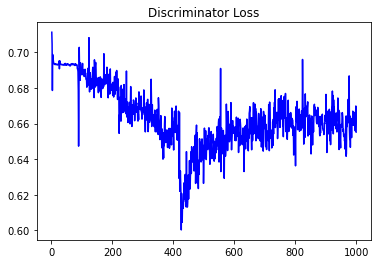

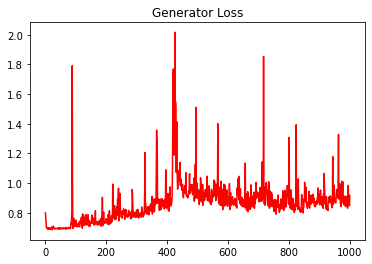

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.39827840272154585


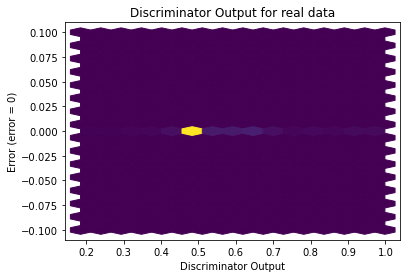

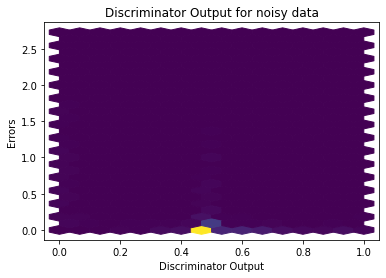

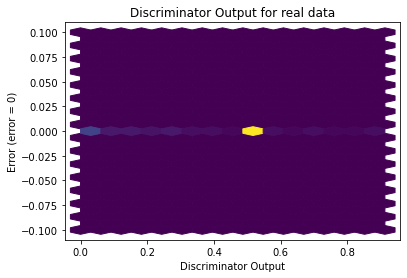

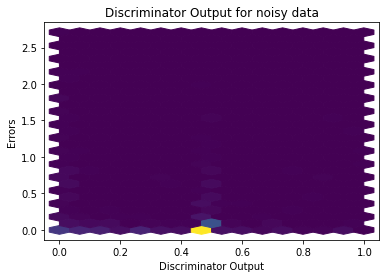

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

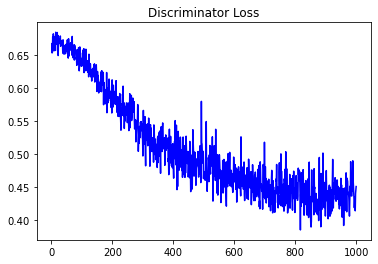

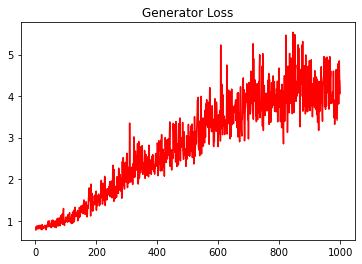

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.3016618925049974


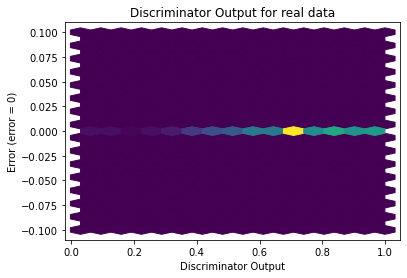

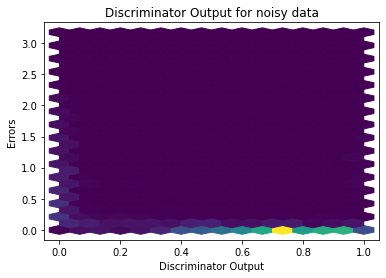

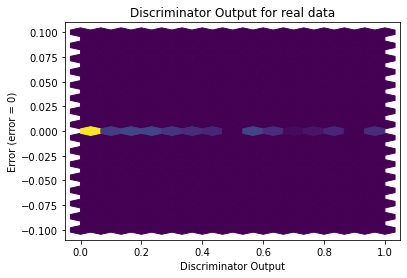

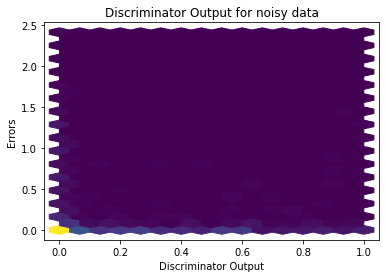

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


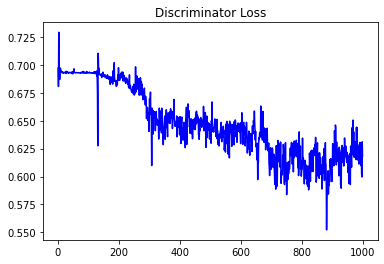

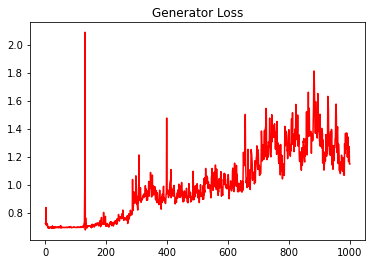

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.28970355574297263


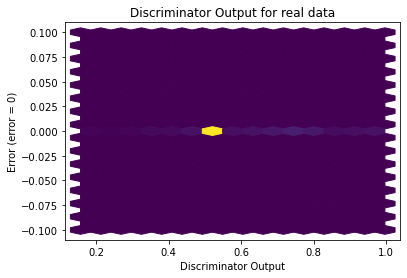

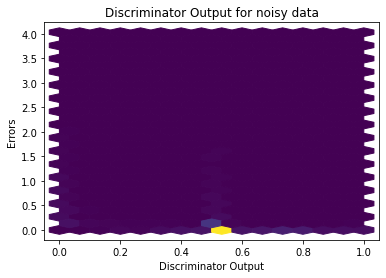

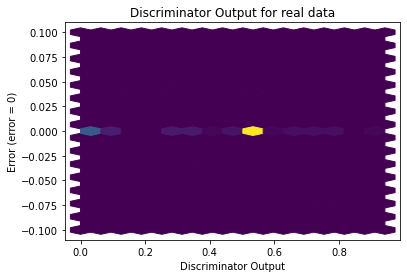

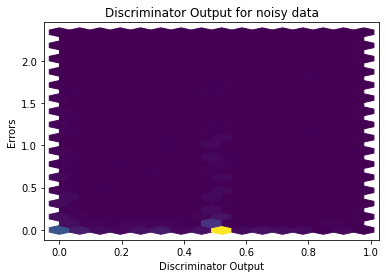

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


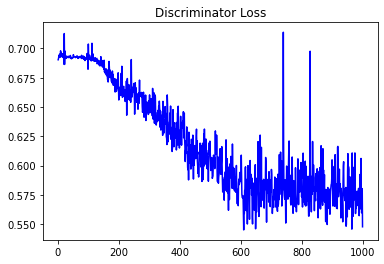

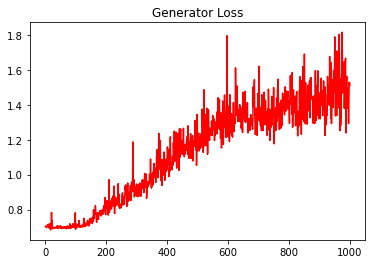

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.2697652874160193


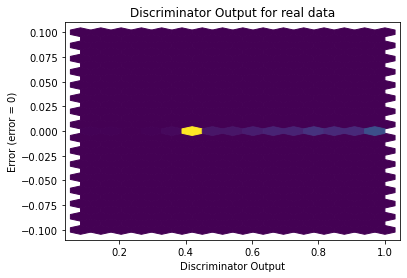

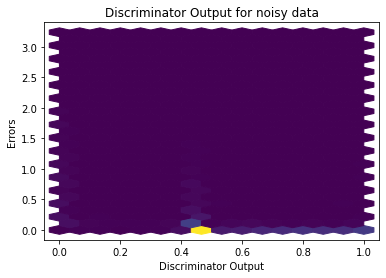

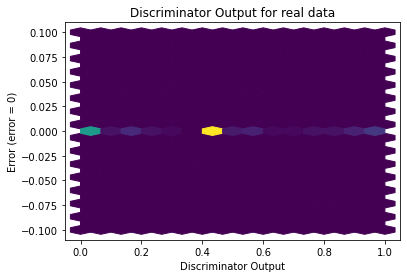

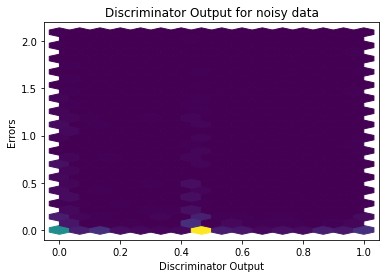

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2173]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2799]], requires_grad=True)
